In [1]:
#Research Question:
#What kind of defensive ability can be defined as an elite defender?
#Which team has the most powerful overall average defensive ability
#Which team has the most competitive ability in the league?

In [1]:
import pandas as pd
df = pd.read_csv('data/raw/latest_RAPTOR_by_team.csv')
df

,player_name,player_id,season,season_type,team,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,...,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
0,Precious Achiuwa,achiupr01,2021,PO,MIA,24,12,-20.130150,13.445869,-6.684281,...,-19.524216,16.885365,-2.638851,0.000721,0.000000,0.000721,-14.239813,7.007386,-7.232427,2.725036
1,Precious Achiuwa,achiupr01,2021,RS,MIA,1557,737,-3.876227,1.172972,-2.703254,...,-4.113660,0.709264,-3.404396,-0.246776,-0.246776,0.000000,-3.657064,0.374133,-3.282930,0.292227
2,Jaylen Adams,adamsja01,2021,RS,MIL,41,18,-13.078112,-3.298021,-16.376133,...,-16.826146,-1.405129,-18.231275,-0.139591,-0.139591,0.000000,-12.863840,-4.114459,-16.978299,-1.834433
3,Steven Adams,adamsst01,2021,RS,NOP,3313,1605,-1.463698,2.084763,0.621065,...,-0.542297,1.044021,0.501724,2.630392,2.630392,0.000000,-0.728367,1.333237,0.604871,-1.226775
4,Bam Adebayo,adebaba01,2021,PO,MIA,293,136,-4.199527,-0.745652,-4.945179,...,-3.965209,1.679654,-2.285555,0.033852,0.000000,0.033852,-3.413399,1.575706,-1.837693,1.814533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860,Trae Young,youngtr01,2021,PO,ATL,1241,603,6.289696,-4.892762,1.396935,...,6.382340,-4.591438,1.790902,1.481875,0.000000,1.481875,9.627494,-5.119280,4.508214,2.794651
861,Trae Young,youngtr01,2021,RS,ATL,4449,2125,5.431654,-3.849879,1.581774,...,5.981243,-3.770601,2.210642,5.481497,5.481497,0.000000,5.723341,-4.382859,1.340482,1.939338
862,Cody Zeller,zelleco01,2021,RS,CHA,2113,1005,-0.658811,1.634766,0.975955,...,-0.135061,1.179117,1.044056,1.950657,1.950657,0.000000,-0.412836,1.035134,0.622298,0.272562
863,Ivica Zubac,zubaciv01,2021,PO,LAC,590,301,-0.610172,3.128919,2.518747,...,-2.056054,2.840494,0.784440,0.556697,0.000000,0.556697,-2.104796,2.298023,0.193227,-0.544855


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
import project_function2 as p1

In [4]:
print("Number of rows and columns respectively:", df.shape)
print("Columns in the dataset:", df.columns)

Number of rows and columns respectively: (865, 23)
Columns in the dataset: Index(['player_name', 'player_id', 'season', 'season_type', 'team', 'poss',
       'mp', 'raptor_box_offense', 'raptor_box_defense', 'raptor_box_total',
       'raptor_onoff_offense', 'raptor_onoff_defense', 'raptor_onoff_total',
       'raptor_offense', 'raptor_defense', 'raptor_total', 'war_total',
       'war_reg_season', 'war_playoffs', 'predator_offense',
       'predator_defense', 'predator_total', 'pace_impact'],
      dtype='object')


In [5]:
df.describe(include='float64').T

,count,mean,std,min,25%,50%,75%,max
raptor_box_offense,865.0,-1.190280,5.029161,-46.708724,-2.690118,-0.878361,1.052860,25.867967
raptor_box_defense,865.0,-0.452295,5.073575,-25.382776,-2.244035,-0.334633,1.589149,66.957703
raptor_box_total,865.0,-1.642575,7.526838,-62.219863,-4.002939,-0.802503,1.754482,67.932330
raptor_onoff_offense,865.0,-2.544279,8.402711,-69.051553,-5.120859,-1.362247,1.629285,28.120957
raptor_onoff_defense,865.0,1.036961,8.677396,-52.889719,-2.148888,0.351031,3.185249,65.729833
raptor_onoff_total,865.0,-1.507318,10.583814,-88.047853,-5.202733,-0.874476,2.719564,55.960874
raptor_offense,865.0,-1.553084,5.329365,-43.366145,-3.123756,-0.982071,0.925080,22.564146
raptor_defense,865.0,-0.165898,5.397463,-30.938383,-2.091871,-0.131748,1.899592,71.024801
raptor_total,865.0,-1.718982,7.758748,-63.749646,-4.267638,-0.947591,1.790902,68.268286
war_total,865.0,0.963499,1.963746,-4.747338,-0.085045,0.219487,1.480337,15.756031


In [6]:
df.describe(include='object').T

,count,unique,top,freq
player_name,865,540,Blake Griffin,3
player_id,865,540,griffbl01,3
season_type,865,2,RS,626
team,865,30,BRK,42


In [7]:
df_cleaned = df.dropna(axis=0)
df_cleaned.shape

(865, 23)

In [8]:
#General facts about the league:
#1. Due to the seasonal trade, Blake Griffin has played with three different teams.
#2. Brooklyn nets have the most amount of players in the league.
#3. Brooklyn nets have changed their team's most frequent during the season.


In [9]:
data ='data/raw/latest_RAPTOR_by_team.csv'
dfu = p1.unprocessed(data)
dfu

,player_name,player_id,season,season_type,team,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,...,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
0,Precious Achiuwa,achiupr01,2021,PO,MIA,24,12,-20.130150,13.445869,-6.684281,...,-19.524216,16.885365,-2.638851,0.000721,0.000000,0.000721,-14.239813,7.007386,-7.232427,2.725036
1,Precious Achiuwa,achiupr01,2021,RS,MIA,1557,737,-3.876227,1.172972,-2.703254,...,-4.113660,0.709264,-3.404396,-0.246776,-0.246776,0.000000,-3.657064,0.374133,-3.282930,0.292227
2,Jaylen Adams,adamsja01,2021,RS,MIL,41,18,-13.078112,-3.298021,-16.376133,...,-16.826146,-1.405129,-18.231275,-0.139591,-0.139591,0.000000,-12.863840,-4.114459,-16.978299,-1.834433
3,Steven Adams,adamsst01,2021,RS,NOP,3313,1605,-1.463698,2.084763,0.621065,...,-0.542297,1.044021,0.501724,2.630392,2.630392,0.000000,-0.728367,1.333237,0.604871,-1.226775
4,Bam Adebayo,adebaba01,2021,PO,MIA,293,136,-4.199527,-0.745652,-4.945179,...,-3.965209,1.679654,-2.285555,0.033852,0.000000,0.033852,-3.413399,1.575706,-1.837693,1.814533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860,Trae Young,youngtr01,2021,PO,ATL,1241,603,6.289696,-4.892762,1.396935,...,6.382340,-4.591438,1.790902,1.481875,0.000000,1.481875,9.627494,-5.119280,4.508214,2.794651
861,Trae Young,youngtr01,2021,RS,ATL,4449,2125,5.431654,-3.849879,1.581774,...,5.981243,-3.770601,2.210642,5.481497,5.481497,0.000000,5.723341,-4.382859,1.340482,1.939338
862,Cody Zeller,zelleco01,2021,RS,CHA,2113,1005,-0.658811,1.634766,0.975955,...,-0.135061,1.179117,1.044056,1.950657,1.950657,0.000000,-0.412836,1.035134,0.622298,0.272562
863,Ivica Zubac,zubaciv01,2021,PO,LAC,590,301,-0.610172,3.128919,2.518747,...,-2.056054,2.840494,0.784440,0.556697,0.000000,0.556697,-2.104796,2.298023,0.193227,-0.544855


In [10]:
df_selected = df_cleaned.loc[0:,["player_name","team","season_type","raptor_box_offense","raptor_box_defense", "raptor_box_total","war_reg_season","pace_impact"]]
df_selected

,player_name,team,season_type,raptor_box_offense,raptor_box_defense,raptor_box_total,war_reg_season,pace_impact
0,Precious Achiuwa,MIA,PO,-20.130150,13.445869,-6.684281,0.000000,2.725036
1,Precious Achiuwa,MIA,RS,-3.876227,1.172972,-2.703254,-0.246776,0.292227
2,Jaylen Adams,MIL,RS,-13.078112,-3.298021,-16.376133,-0.139591,-1.834433
3,Steven Adams,NOP,RS,-1.463698,2.084763,0.621065,2.630392,-1.226775
4,Bam Adebayo,MIA,PO,-4.199527,-0.745652,-4.945179,0.000000,1.814533
...,...,...,...,...,...,...,...,...
860,Trae Young,ATL,PO,6.289696,-4.892762,1.396935,0.000000,2.794651
861,Trae Young,ATL,RS,5.431654,-3.849879,1.581774,5.481497,1.939338
862,Cody Zeller,CHA,RS,-0.658811,1.634766,0.975955,1.950657,0.272562
863,Ivica Zubac,LAC,PO,-0.610172,3.128919,2.518747,0.000000,-0.544855


In [11]:
df_selected = p1.specify(df_selected,'season_type', "RS")
df_selected

,player_name,team,season_type,raptor_box_offense,raptor_box_defense,raptor_box_total,war_reg_season,pace_impact
1,Precious Achiuwa,MIA,RS,-3.876227,1.172972,-2.703254,-0.246776,0.292227
2,Jaylen Adams,MIL,RS,-13.078112,-3.298021,-16.376133,-0.139591,-1.834433
3,Steven Adams,NOP,RS,-1.463698,2.084763,0.621065,2.630392,-1.226775
5,Bam Adebayo,MIA,RS,0.233293,2.069195,2.302488,5.372652,-0.114448
6,LaMarcus Aldridge,SAS,RS,-3.087085,-0.955021,-4.042107,-0.426374,-0.433340
...,...,...,...,...,...,...,...,...
858,Delon Wright,DET,RS,1.401314,2.969010,4.370323,3.617276,-1.603237
859,Thaddeus Young,CHI,RS,1.957184,1.493618,3.450802,6.296487,-0.023946
861,Trae Young,ATL,RS,5.431654,-3.849879,1.581774,5.481497,1.939338
862,Cody Zeller,CHA,RS,-0.658811,1.634766,0.975955,1.950657,0.272562


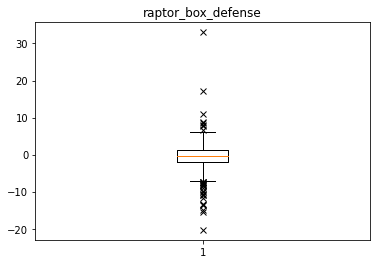

Q1 = -2.0845639087198062
Q2 = -0.36876397922318327
Q3 = 1.3203691471548853
IQR = 3.4049330558746913


In [12]:
defense = p1.select(df_selected,'raptor_box_defense')
##graph1 = plt.boxplot(defense)
graph1 = plt.boxplot(defense, notch=False, sym='x', vert=True, whis=1.5,
        positions=None, widths=None, patch_artist=False,
        bootstrap=None, usermedians=None, conf_intervals=None)
plt.title("raptor_box_defense")
plt.show()
print('Q1 =',defense.quantile(0.25))
print('Q2 =',defense.quantile(0.50))
print('Q3 =',defense.quantile(0.75))
print('IQR =',defense.quantile(0.75)-defense.quantile(0.25))

In [13]:
#Notes: What kind of defensive ability can be defined as an elite defender? (By analyzing raptor box defense)
# Top 25 % of the defender in the league has scored 1.32 on the raptor box defense.
# To become an average defender in the league must have -0.36 on the raptor box defense.
# top 25% and the bottom 25% have a different score of 3.4 in raptor box defense.

#This graph can help us explain my question-1 "What kind of defensive ability can be defined as an elite defender?". To become an average defender in the league must have -0.36 on the raptor box defense. For top 25% of the defender, player should have a raptor box defense higher than 1.32. 
#Players like Bam Adebayo (raptor box defense 2.06) can be define as a elite defender

In [14]:
df1 = df_selected.groupby('team', as_index=False).mean()
df1

,team,raptor_box_offense,raptor_box_defense,raptor_box_total,war_reg_season,pace_impact
0,ATL,-1.069265,-0.380846,-1.450111,1.623688,-0.225762
1,BOS,-0.917756,0.303708,-0.614048,1.292257,0.073911
2,BRK,-1.788644,0.052888,-1.735755,1.254203,0.127514
3,CHA,-0.968647,-0.871776,-1.840423,1.176767,-0.042952
4,CHI,-0.802117,0.814689,0.012571,1.013025,0.051700
5,CLE,-2.405264,0.211734,-2.193530,0.260899,-0.098373
6,DAL,-1.060486,-0.282319,-1.342805,1.569175,-0.117795
7,DEN,-1.693643,-1.711370,-3.405013,1.671519,-0.163912
8,DET,-1.149216,-0.243026,-1.392242,0.683250,-0.371933
9,GSW,-1.167877,-0.254150,-1.422027,1.459122,0.521528


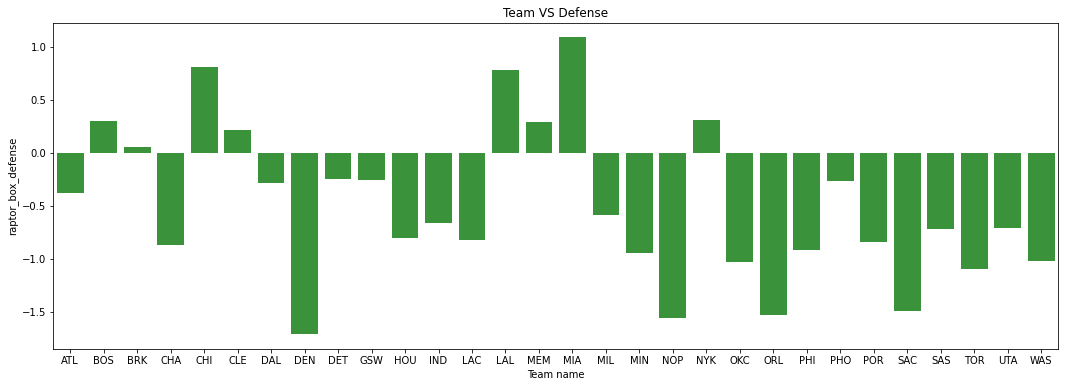

In [15]:
dfdata = df1
##a4_dims = (50,20)
##fig, ax = plt.subplot(figsize = a4_dims)
plt.figure(figsize=(18,6))
ax = sns.barplot(x="team", y="raptor_box_defense", data=dfdata, color="tab:green")
ax.set_title("Team VS Defense")
ax.set_xlabel("Team name")
ax.set_ylabel("raptor_box_defense")
ax
plt.show()

In [16]:
#This graaph can explain the second question:Which team has the most powerful overall average defensive ability (Analyzing with raptor_box_defense)
# I collected all players data and create each teams' weightedaverage defensive rating. I found that only 8 teams has a positive rating of defense, and MIA has the best defense ability.

# Miami Heat has the most powerful defense ability in the league.
# Denver Nugget has the worst defense ability in the league.
# There are only 8 teams in the league that has a consistent on defensive, which has a positive score.


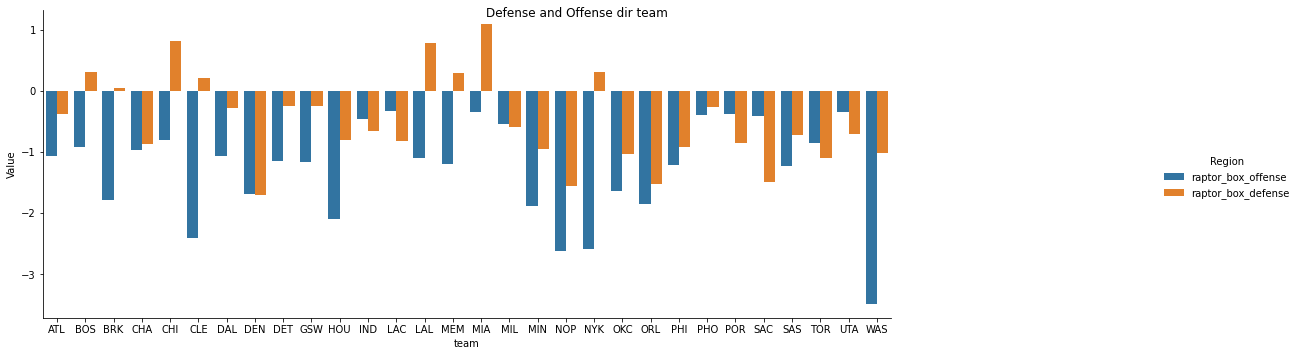

In [17]:
dfof = pd.melt(df1, id_vars="team", value_vars=["raptor_box_offense", "raptor_box_defense"],var_name ='Region', value_name ='Value')
ax = sns.catplot(x="team",y="Value",hue="Region",data = dfof,kind ="bar")
ax.fig.suptitle("Defense and Offense dir team")
ax.fig.set_size_inches(20,5)
plt.show()

In [18]:
#The third graph can explian the third question  : Which team has the most competitive ability in the league? (Analyzing with raptor_box_defense and raptor_box_offense)
# All teams are inconsistent with the offense, the value is low.  (Negative number)
# Washington Wizzard has the lowest offensive ability.
# Lakers, Bulls, and Heat have the best (offense and defense) ability in the league.

In [19]:
dff = p1.load_and_process('data/raw/latest_RAPTOR_by_team.csv')
dff

,player_name,raptor_box_offense,raptor_box_defense,pi,victory
0,Ty-Shon Alexander,25.867967,-3.340925,0.537056,1
1,Norvel Pelle,24.889198,-7.176328,1.992069,1
2,Udonis Haslem,17.508430,33.030435,0.914219,0
3,T.J. Leaf,16.677856,4.367044,-0.149265,1
4,Damian Lillard,15.464571,3.413589,2.655016,1
...,...,...,...,...,...
317,Desmond Bane,0.050573,-1.623504,-0.538428,1
318,Otto Porter Jr.,0.042426,-1.828439,0.308842,1
319,Norman Powell,0.011195,-3.074305,0.182590,1
320,Kevin Huerter,0.003219,-0.063525,-0.144126,1
